In [79]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [81]:
class GeneticAlgorithm(ABC):
    n = 10  # Nombre d'objets
    k = 3  # Nombre de contraintes de coût
    population_size = 20

    def __init__(self):
        np.random.seed(1)
        self.B = np.random.randint(
            50, 100, size=(self.k)
        )  # Budgets pour chaque contrainte
        self.utilities = np.random.randint(1, 100, size=self.n)  # Utilities des objets
        self.costs = np.random.randint(1, 20, size=(self.n, self.k))  # Costs des objets
        cost_columns = [f"cost_{i+1}" for i in range(self.k)]

        print("Liste de budgets:")
        print(self.B)
        df = pd.DataFrame(
            np.column_stack((self.utilities, self.costs)),
            columns=["utilities"] + cost_columns,
        )
        print("Liste d'objets:")
        print(df)
        self.initializePopulation()

    @abstractmethod
    def initializePopulation(self):
        pass

    def cost(self, solution):
        total_cost = solution @ self.costs
        return total_cost

    @abstractmethod
    def fitness(self, solution):
        pass

    @abstractmethod
    def repair(self, solution):
        pass

    @abstractmethod
    def select(self, population):
        pass

    @abstractmethod
    def crossover(self, parent1, parent2):
        pass

    @abstractmethod
    def mutate(self, individual):
        pass

    def run(self, generations):
        population = np.random.randint(2, size=(self.population_size, self.n))
        for _ in range(generations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1 = self.select(population)
                parent2 = self.select(population)
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent1, parent2)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                child1 = self.repair(child1)
                child2 = self.repair(child2)
                new_population.extend([child1, child2])
            population = new_population
        return population

    @classmethod
    def print_class_name(cls):
        return cls.__class__.__name__

    def solution(self, generations):
        return max(self.run(generations), key=self.fitness)

    def get_plot_data(self):
        X = []
        Y = []
        for i in range(100, 500, 100):
            X.append(i)
            Y.append(self.fitness((self.solution(i))))
        return [X, Y]

In [83]:
class GeneticAlgorithm1(GeneticAlgorithm):
    def initializePopulation(self):
        self.population = np.random.randint(2, size=(self.population_size, self.n))

    def fitness(self, solution):
        total_utility = np.sum(solution * self.utilities)
        return total_utility

    def repair(self, solution):
        while any(
            np.dot(solution, self.costs[:, j]) > self.B[j] for j in range(self.k)
        ):
            for i in reversed(range(self.n)):
                if solution[i] == 1 and any(
                    np.dot(solution, self.costs[:, j]) > self.B[j]
                    for j in range(self.k)
                ):
                    solution[i] = 0
        return solution

    def select(self, population):
        fitnesses = np.array([self.fitness(individual) for individual in population])
        probabilities = fitnesses / fitnesses.sum()
        index = np.random.choice(range(self.population_size), p=probabilities)
        return population[index]

    def crossover(self, parent1, parent2):
        child = np.array(
            [parent1[i] if random.random() > 0.5 else parent2[i] for i in range(self.n)]
        )
        return child

    def mutate(self, individual):
        index = np.random.randint(self.n)
        individual[index] = 1 - individual[index]
        return individual

Liste de budgets:
[87 93 62]
Liste d'objets:
   utilities  cost_1  cost_2  cost_3
0         73      14       7      19
1         10       6      19      12
2         76      11      15      19
3          6       5      10      18
4         80       1      14      10
5         65      10       8       2
6         17       1      18       9
7          2      14      16      11
8         77       9       8       4
9         72       7      18       4
[100, 200, 300, 400]
[304, 373, 394, 366]


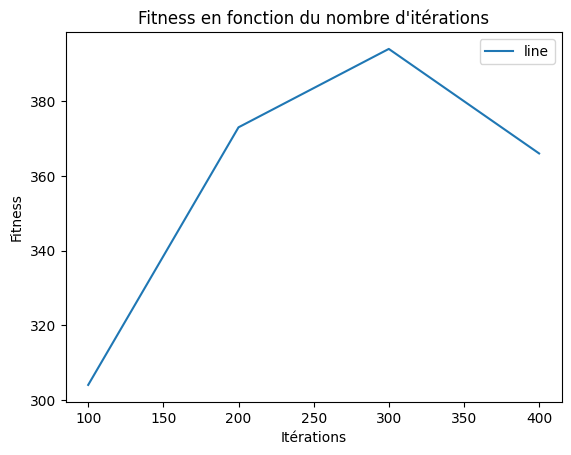

In [78]:
ga1 = GeneticAlgorithm1()
# best_solution = ga1.solution(100)
# print("Meilleure solution:", best_solution)
# print("Utilité totale:", ga1.fitness(best_solution))
# print("Cost totale:", ga1.cost(best_solution))

X, Y = ga1.get_plot_data()
print(X)
print(Y)
plt.plot(X, Y, label="line")
# naming the x axis
plt.xlabel("Itérations")
# naming the y axis
plt.ylabel("Fitness")
# giving a title to my graph
plt.title("Fitness en fonction du nombre d'itérations")

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()